## Importaciones

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import inv

#plt.style.use('seaborn-whitegrid')
plt.style.use('ggplot')

"""
#ploty
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='csanin', api_key='KD9gTNxygOYYHTAT0KvP')
"""

"\n#ploty\nimport plotly.plotly as py\nimport plotly.graph_objs as go\nimport plotly \nplotly.tools.set_credentials_file(username='csanin', api_key='KD9gTNxygOYYHTAT0KvP')\n"

## Funciones

In [2]:
# calcular función de costos
def computeCost(X, y, theta):
    m = len(y)   
    h = np.dot(X,theta)
    e = (h - y)**2
    sum_e = np.sum(e)
    J = (0.5/m) * sum_e
    return J

# gradiente desendiente
def gradientDescent(X, y, theta, alpha, num_iter):
    # inicializar valores
    m = len(y)
    J_historico = np.zeros((num_iter))
    
    if theta.shape[0] == 2:
        theta0_hist, theta1_hist = np.zeros((num_iter)),np.zeros((num_iter))
        
    for i in range(0, num_iter):
        factor = alpha/m
        h = np.dot(X,theta)
        derivada = np.dot(X.T,(h-y))        
        theta = theta - (factor * derivada)
        # Guardar el historico de costo   
        J_historico[i] = computeCost(X, y, theta);
        
        if theta.shape[0] == 2:
            theta0_hist[i]= theta[0][0]
            theta1_hist[i] = theta[1][0]
    
    if theta.shape[0] == 2:
        return[ theta, J_historico, theta0_hist, theta1_hist ]
    else:
         return[ theta, J_historico ]
    

# Normalizar Matris de datos
def featureNormalize(X):
    X_norm = X.copy
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma
    
    return [X_norm, mu, sigma]

# Ecuación normal
def normalEqn(X, y):
    theta = np.zeros((X.shape[1],1))
    theta = np.dot( np.dot( inv(np.dot( X.T, X) ), X.T), y )
    return theta
    

## Parte 1 : Normalización de Variables

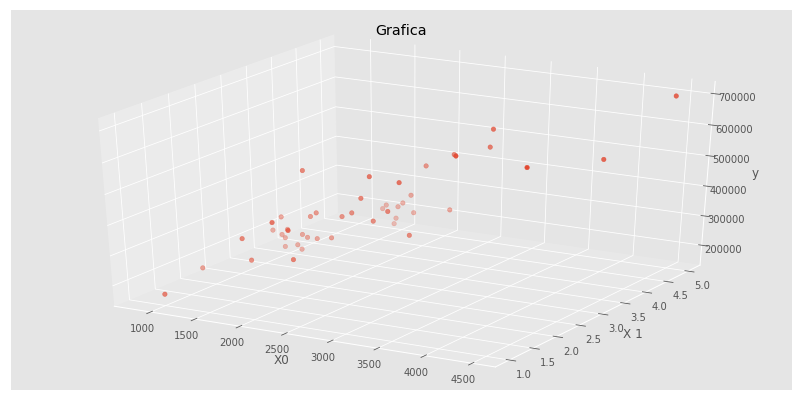

In [3]:
# cargar datos
datos = np.loadtxt(fname = "ex1data2.txt", delimiter =",")
X = datos[:,0:-1]
y = datos[:,-1]
m = len(y)
n = X.shape[1]
# convertir en vectores filas
y = y.reshape(m,1)

# grafica 3D 
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.set_title("Grafica")
ax.set_xlabel(r'X0')
ax.set_ylabel(r'X 1')
ax.set_zlabel(r'y')
#ax.view_init(elev=45, azim=40)
ax.scatter(X[:,0], X[:,1], y)
plt.show()

## Parte 2 : Gradiente Desendiente

Primeros 10 ejemplos del dataset: 

 X = [2104.0  3.0], y = 399900.0
 X = [1600.0  3.0], y = 329900.0
 X = [2400.0  3.0], y = 369000.0
 X = [1416.0  2.0], y = 232000.0
 X = [3000.0  4.0], y = 539900.0
 X = [1985.0  4.0], y = 299900.0
 X = [1534.0  3.0], y = 314900.0
 X = [1427.0  3.0], y = 198999.0
 X = [1380.0  3.0], y = 212000.0
 X = [1494.0  3.0], y = 242500.0


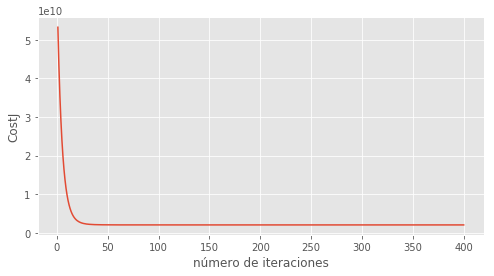

Theta calculado con el gradiente desendiente: 

 theta_0 = 340412.66
 theta_1 = 109447.80
 theta_2 = -6578.35


Predicción de precio para 1650 sq-ft, 3 br casa (Usando gradiente desendiente):
293081.4645291686


In [4]:
#imprimir algunos puntos
print('Primeros 10 ejemplos del dataset: \n');
for i in range(0,10):
    print(" X = [{0}  {1}], y = {2}".format(X[i,0], X[i,1], y[i,0]))
    

if X.shape[1] == n:
    # Normalizar variables con media cero
    X, mu, sigma = featureNormalize(X)
    # adicionar columna de 1 a X
    X = np.append(np.ones((m,1)), X, axis= 1)

    
# estableciendo parametros del gradiente desendente
iteraciones = 400
alpha = 0.1

theta = np.zeros((X.shape[1],1))
theta, J_historico = gradientDescent(X, y, theta, alpha, iteraciones)

# Graficar la funcion de costos
plt.figure(figsize=(8,4))
plt.plot(range(1,401), J_historico, markersize = 10)
plt.xlabel("número de iteraciones")
plt.ylabel("CostJ")
plt.show()


# Display gradient descent's result

print('Theta calculado con el gradiente desendiente: \n')
for i,t in enumerate(theta):
    print(" theta_{0} = {1:5.2f}".format(i, t[0]))

print('\n')

# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
price = np.array([[1, 1650, 3]])
price = (price - np.append(0,mu))/np.append(1,sigma)
print("Predicción de precio para 1650 sq-ft, 3 br casa (Usando gradiente desendiente):")
print(np.dot(price,theta)[0][0])

## Parte 3  : Ecuación Normal

In [10]:
# cargar datos
datos = np.loadtxt(fname = "ex1data2.txt", delimiter =",")
X = datos[:,0:-1]
y = datos[:,-1]
m = len(y)
n = X.shape[1]
# convertir en vectores filas
y = y.reshape(m,1)

if X.shape[1] == n:
    # adicionar columna de 1 a X
    X = np.append(np.ones((m,1)), X, axis= 1)

theta = normalEqn(X, y)

print('Theta calculado con la ecuación normal:')
for i,t in enumerate(theta):
    print(" theta_{0} = {1:5.2f}".format(i, t[0]))

# Recall that the first column of X is all-ones. 
price = np.array([[1, 1650, 3]])

print("\nPredicción de precio para 1650 sq-ft, 3 br casa (Usando Ecuación Normal):")
print(np.dot(price,theta)[0][0])

Theta calculado con la ecuación normal:
 theta_0 = 89597.91
 theta_1 = 139.21
 theta_2 = -8738.02

Predicción de precio para 1650 sq-ft, 3 br casa (Usando Ecuación Normal):
293081.46433489426
